                                  Maksim Ohvrill - 589664

# **Assignment 2 - [Proportional-Integral-Derivative Controller]**

*Simulation that tests influence of communication delays on the quality of PID controller transmitting over TCP/UDP*

## **Mathematical statement of the problem:**

### Proportional (Kp) Control:

Proportional control is the most basic component of a PID controller. It responds to the current error, which is the difference between the desired setpoint ($\text{setpoint}$) and the current temperature ($\text{temperatPID}$). The proportional term ($P$) is calculated as:

$$P = K_p \cdot (\text{setpoint} - \text{temperatPID})$$

- $P$: Proportional term.
- $K_p$: Proportional constant.

**Visualization:**
Imagine a scenario where you want to heat a room to a target temperature of 25°C, but the current temperature is 20°C. The error is 5°C ($\text{setpoint} - \text{temperatPID}$). With a non-zero $K_p$, the proportional control output ($P$) would be a force proportional to the error, pushing the temperature closer to the setpoint.

- Large $K_p$: The control output ($P$) is highly sensitive to small errors, resulting in rapid adjustments.
- Small $K_p$: The control output ($P$) is less sensitive to errors, causing slower adjustments.

### Integral (Ki) Control:

Integral control accumulates the error over time and responds to long-term deviations from the setpoint. The integral term ($I$) is calculated as:

$$I = K_i \cdot \int_0^t (\text{setpoint} - \text{temperatPID}) \, dt$$

- $I$: Integral term.
- $K_i$: Integral constant.

**Visualization:**
Consider a scenario where the room temperature is initially at 20°C (5°C below the setpoint of 25°C). The proportional control alone might not be sufficient to bring the room to the desired temperature. The integral term ($I$) accumulates the error over time. The longer the error persists, the larger the integral term becomes, pushing the system to the setpoint.

- Large $K_i$: The integral term ($I$) accumulates error quickly, providing strong correction for steady-state errors.
- Small $K_i$: The integral term ($I$) accumulates error slowly, which may be useful when steady-state errors should be tolerated.

### Derivative (Kd) Control:

Derivative control responds to the rate of change of the error. The derivative term ($D$) is calculated as:

$$D = K_d \cdot \frac{d(\text{setpoint} - \text{temperatPID})}{dt}$$

- $D$: Derivative term.
- $K_d$: Derivative constant.

**Visualization:**
Imagine that the room temperature is initially at 20°C, and the heating system is turned on. Without derivative control, the temperature might overshoot the setpoint and oscillate around it. The derivative term ($D$) responds to the rate at which the temperature is changing, helping to slow down or speed up adjustments as needed to reach the setpoint smoothly.

- Large $K_d$: The derivative term ($D$) reacts strongly to rapid changes in error, helping to dampen oscillations.
- Small $K_d$: The derivative term ($D$) reacts less to changes in error, which may result in smoother but slower adjustments.

### Combined PID Control Output:

The PID controller output ($\text{outputPID}$) is calculated by combining these three terms:

$$\text{outputPID} = P + I + D$$

- $\text{outputPID}$: Final control output.
- $P$: Proportional term.
- $I$: Integral term.
- $D$: Derivative term.

The three components, when combined in a PID controller, work together to achieve precise control. The proportional term provides immediate response to errors, the integral term eliminates steady-state errors, and the derivative term helps control the system's dynamic behavior.

Tuning these constants involves finding the right balance to achieve the desired control performance while avoiding overshooting or excessive oscillations. It often requires experimentation and fine-tuning in real systems to achieve optimal control.


## **Mathematical statement -> c# code (example usecase):**

In [1]:
// Proportional (Kp) Control
double Kp = 0.5;
double setpoint = 25.0;
double temperatPID = 20.0;

double P = Kp * (setpoint - temperatPID);

// Integral (Ki) Control
double Ki = 0.2;
double dt = 0.01; // Time interval

// Integral function
double Integral(double setpoint, double temperatPID, double dt)
{
    double integral = 0.0;
    integral += (setpoint - temperatPID) * dt;
    return integral;
}

double I = Ki * Integral(setpoint, temperatPID, dt);

// Derivative (Kd) Control
double Kd = 0.1;

// Derivative function
double Derivative(double setpoint, double temperatPID, double dt)
{
    double derivative = 0.0;
    derivative = (setpoint - temperatPID) / dt;
    return derivative;
}

double D = Kd * Derivative(setpoint, temperatPID, dt);

// Combined PID Control Output
double outputPID = P + I + D;

outputPID

52.51

## **System diagram of the problem:**

![Skjermbilde 2023-11-13 231429.png](<attachment:Skjermbilde 2023-11-13 231429.png>)
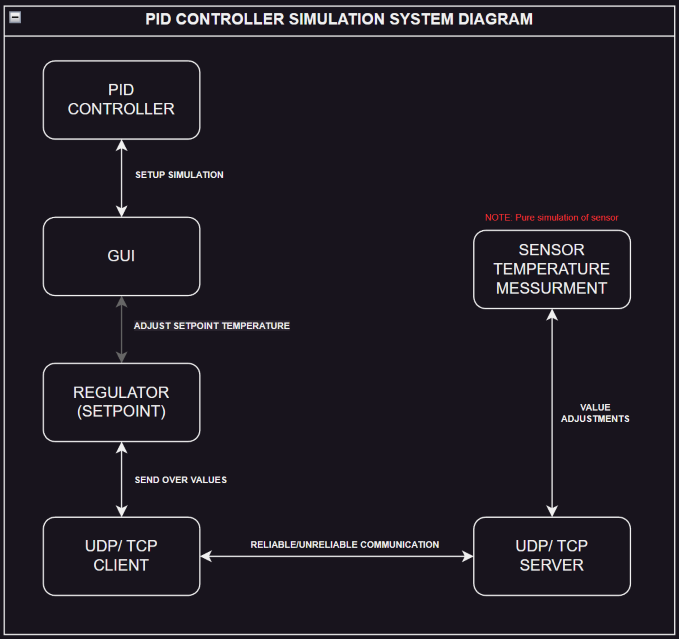

## **Task: Test the Influence of Communication Delays on PID Control**

*Notice: The executable build files can be found in the bin folder of the server and client projects.*

1. Prepare a test environment on a PC with the following components:
   - PID simulation
   - Charts for visualization
   - Communication between two processes
   - Communication between two PCs
   - Use UDP (and TCP as an option)

2. Investigate how the distance (time) between two PCs affects PID control.

   - Experiment on two PCs, either in the same room or in different locations.

3. Evaluate how the environment (communication traffic) affects PID control.

   - Compare scenarios with no network traffic around and high network traffic around.


### **Configure the firewall of the router for UDP and TCP communication WAN -> LAN**
*Open the ports of the network router for UDP and TCP communication through public IP-addresses*

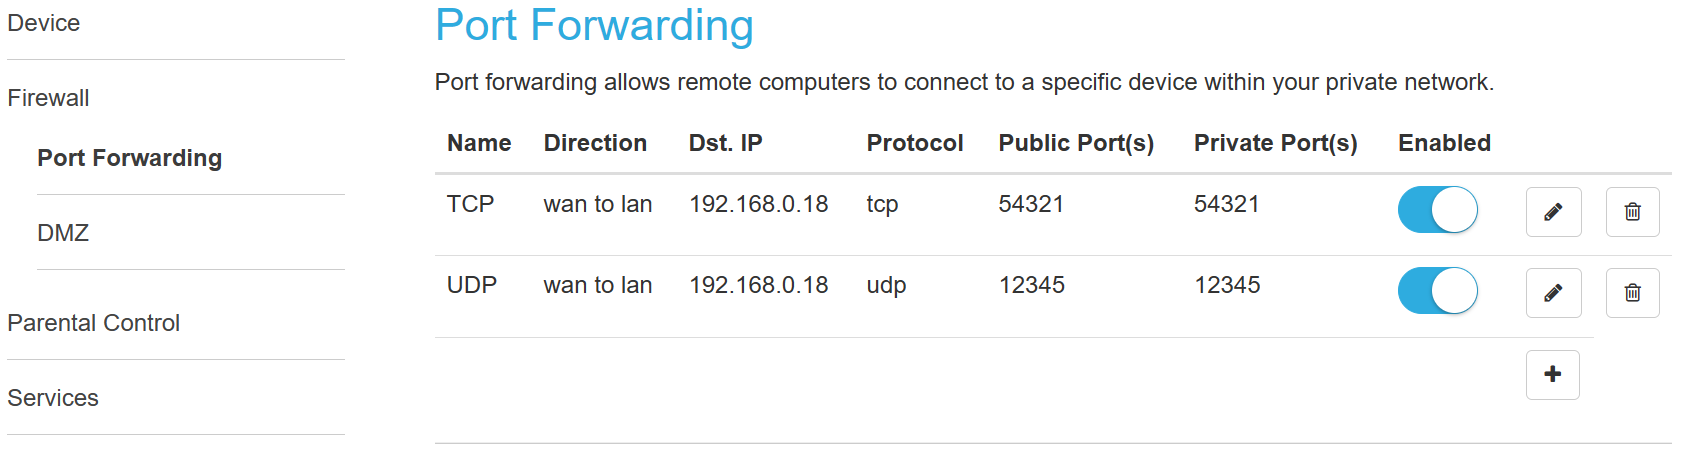

### **UDP that simulates high traffic with having multiple clients sending data to the server:**

*When the serverprogram is runned it gives the user it's local & public IP-address and the port number that the server is listening to.*

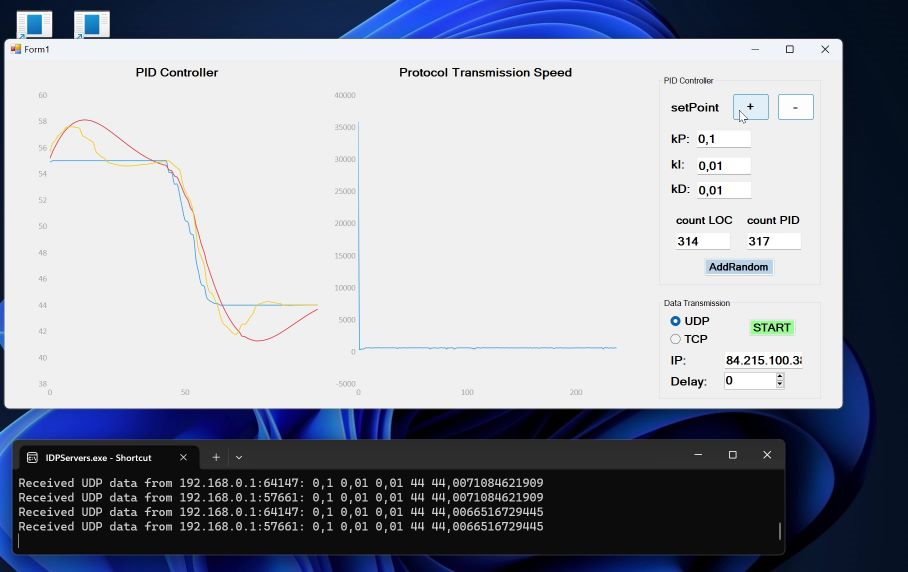

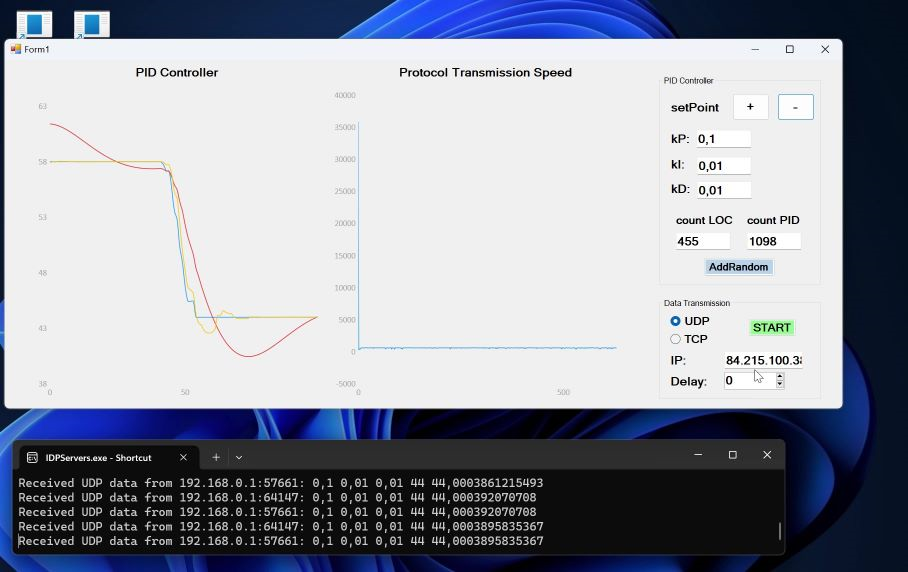

*It's possible to spot the huger gap between the setpoint and the temperature when the UDP traffic is high.*

### **TCP that simulates custom delay between client and server:**

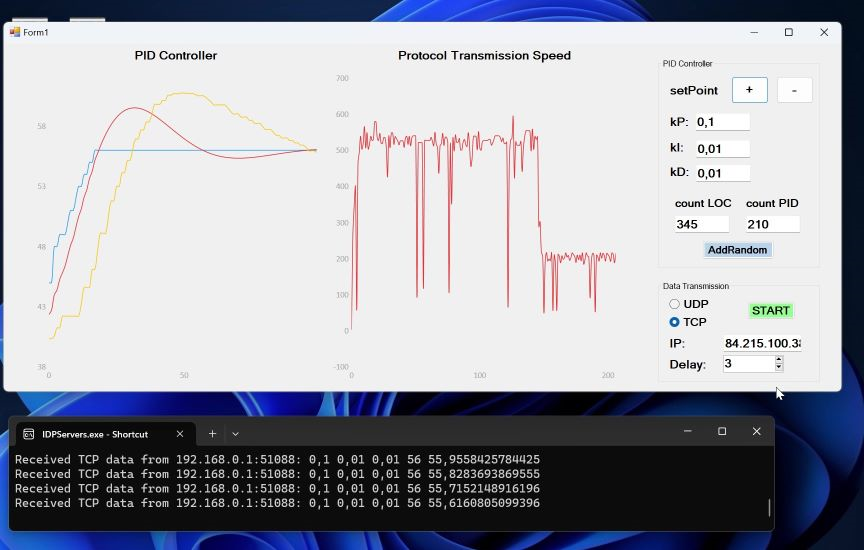

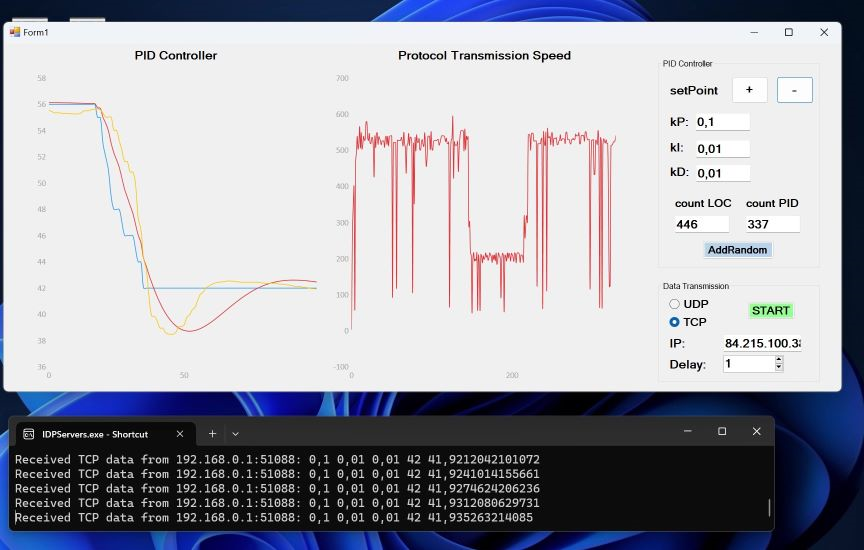

*The visuals of the TCP delay as the images show shows that there is more displacement between the setpoint and the temperature when the delay is higher.*

